In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
iris = datasets.load_iris()
X = iris["data"]
Y = iris["target"]
label = iris["feature_names"]
df = pd.DataFrame(data=X, columns=label)
label.append("label")
df["label"] = Y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
clf = SVC(kernel='rbf',random_state=42)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

1.0

In [4]:
print("f2:",fbeta_score(y_test,y_pred,beta=2,average='macro'))
print(classification_report(y_test,y_pred))

f2: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


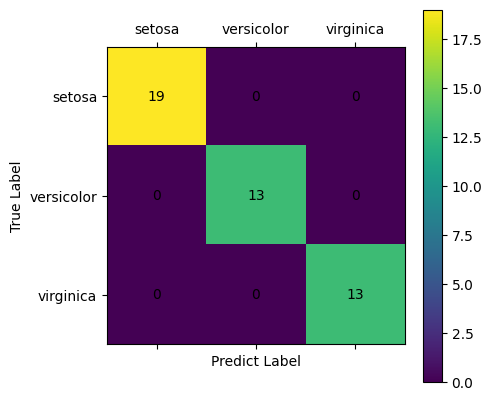

In [5]:
y_pred = clf.predict(x_test)
y_real = y_test
cf_mx = confusion_matrix(y_real,y_pred)
print(cf_mx)
plt.matshow(cf_mx)

for x in range(len(cf_mx)):
    for y in range(len(cf_mx)):
        info = cf_mx[y,x]
        plt.text(x,y,info,verticalalignment='center',horizontalalignment='center')


plt.xticks(range(len(iris["target_names"])),iris["target_names"])
plt.yticks(range(len(iris["target_names"])),iris["target_names"])
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.colorbar()
plt.show()